## State Level of Data Analysis

state_merge_data1.csv dataset covers the year of 2016.It includes total numbers of graduates in Engineering and science major,total number of employed person,us population and sales tax by state.<br\>

state_merge_data2.csv dataset covers the year of 2016.It includes GDP,personal income,person consumption expenditure,and RPP.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [17]:
path ='/Users/gyang/Desktop/yang_project/capstone/data/'

In [82]:
# Load dataset 
state_merge_data1 = pd.read_csv(path + 'state_merge_data1.csv')
state_merge_data2 = pd.read_csv(path + 'final_state_data.csv')
#state_merge_data.set_index("state", inplace = True)

In [83]:
state_merge_data1.head()

,state,total_engi,temporary_visa_engi,totals_science,temporary_visa_science,total_area_sqm,land_area,water_area,total_employed,member of unions,percent of employed,represented by unions,union_represent_percentage,sales_tax,us_population
0,Alabama,2245,1044,211,123,52420,50645,1775,1895.0,153.0,8.1,170.0,9.0,4.00,4860545
1,Alaska,167,43,33,4,665384,570641,94743,297.0,55.0,18.5,59.0,19.9,0.00,741522
2,Arizona,3506,2030,557,263,113990,113594,396,2727.0,122.0,4.5,151.0,5.5,5.60,6908642
3,Arkansas,600,318,75,27,53179,52035,1143,1186.0,47.0,3.9,59.0,5.0,6.00,2988231
4,California,23957,13083,6351,3338,163695,155779,7916,16001.0,2551.0,15.9,2796.0,17.5,6.25,39296476


In [84]:
state_merge_data2.head()

,state,irp,RPP,gdp,personal income,person consumption expenditure,ending_establishments,expanding_establish,gross_contracting_establishment,net_change,opening_establish,total_contract,total_expanding
0,Alabama,95.6,86.6,819445,189161974,152397,56172,304532,301686,12265,65591,357858,370123
1,Alaska,116.4,105.4,202852,41283275,36758,16926,79348,88035,-7847,17766,104961,97114
2,Arizona,106.0,95.9,1211807,280120037,239680,97941,466729,417798,61663,110673,515739,577402
3,Arkansas,96.0,86.9,482755,118697988,92984,35274,187209,185821,7161,41047,221095,228256
4,California,126.4,114.4,10410688,2212691221,1641724,749289,3071572,2869798,277254,824769,3619087,3896341


In [85]:
state_merge_data =state_merge_data1.merge(state_merge_data2,on='state')

In [86]:
state_merge_data.dtypes

state                               object
total_engi                           int64
temporary_visa_engi                  int64
totals_science                       int64
temporary_visa_science               int64
total_area_sqm                       int64
land_area                            int64
water_area                           int64
total_employed                     float64
member of unions                   float64
percent of employed                float64
represented by unions              float64
union_represent_percentage         float64
sales_tax                          float64
us_population                        int64
irp                                float64
RPP                                float64
gdp                                  int64
personal income                      int64
person consumption expenditure       int64
ending_establishments                int64
expanding_establish                  int64
gross_contracting_establishment      int64
net_change 

In [87]:
state_merge_data.to_csv(path +'state_merge_data_total.csv', index=False, header=True)

In [88]:
#state_merge_data_object_list = list(state_merge_data.select_dtypes(include=['object']).columns)
#state_merge_data_object_list

In [89]:
#state_merge_data2 =state_merge_data.copy()

#for i in state_merge_data_object_list:
#    state_merge_data2[i] = state_merge_data2[i].astype('float64')

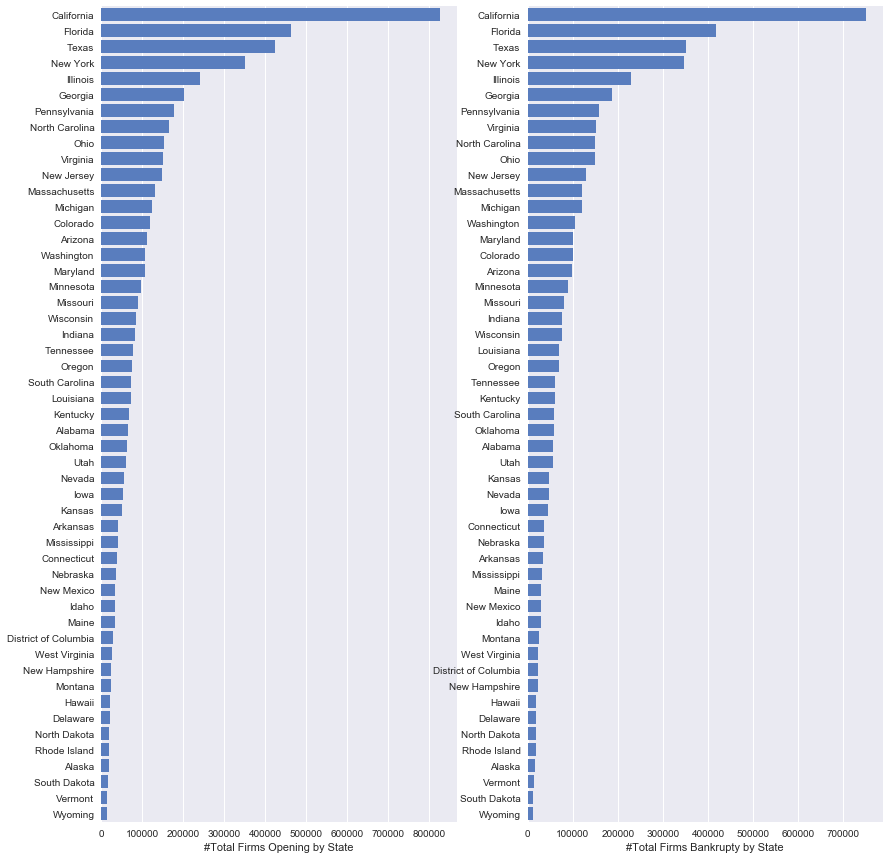

In [121]:
sns.set()

#depentent variables
state_merge_data.sort_values(['opening_establish'], ascending=False, inplace=True)

f, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 15))

#add col 1 -- opening_establish
sns.set_color_codes("muted")
sns.barplot(x='opening_establish', y='state', data =state_merge_data,color="b",ax=ax[0])
ax[0].set(ylabel="",xlabel="#Total Firms Opening by State")
sns.despine(left=True, bottom=True)

#add col 2 -- ending_establishments 
state_merge_data.sort_values(['ending_establishments'], ascending=False, inplace=True)
sns.set_color_codes("muted")
sns.barplot(x='ending_establishments', y='state', data=state_merge_data,color="b",ax=ax[1])
ax[1].set(ylabel="",xlabel="#Total Firms Bankrupty by State")
sns.despine(left=True, bottom=True)

#add col 3 -- total_expanding 
#state_merge_data.sort_values(['total_expanding'], ascending=False, inplace=True)
#sns.set_color_codes("muted")
#sns.barplot(x='total_expanding', y='state', data=state_merge_data,color="b",ax=ax[2])
#ax[2].set(ylabel="",xlabel="#Total Firms Expanding by State")
#sns.despine(left=True, bottom=True)

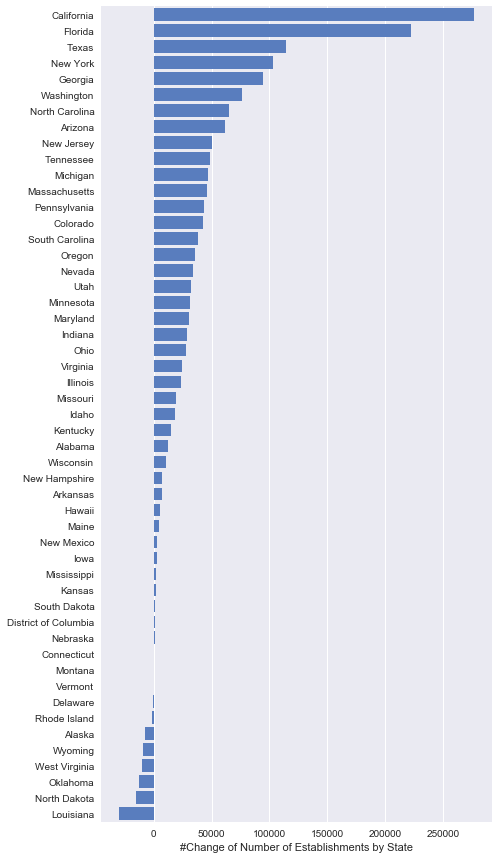

In [124]:
f, ax = plt.subplots(figsize=(7, 15))

state_merge_data.sort_values(['net_change'], ascending=False, inplace=True)
sns.set_color_codes("muted")
sns.barplot(x='net_change', y='state', data=state_merge_data,color="b")
ax.set(ylabel="",xlabel="#Change of Number of Establishments by State")
sns.despine(left=True, bottom=True)

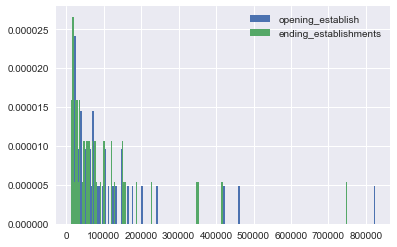

In [118]:
plt.hist(state_merge_data['opening_establish'], bins = 200, density=True,label ='opening_establish')
plt.hist(state_merge_data['ending_establishments'], bins = 200, density=True,label ='ending_establishments')
plt.legend(loc='upper right')
plt.show()

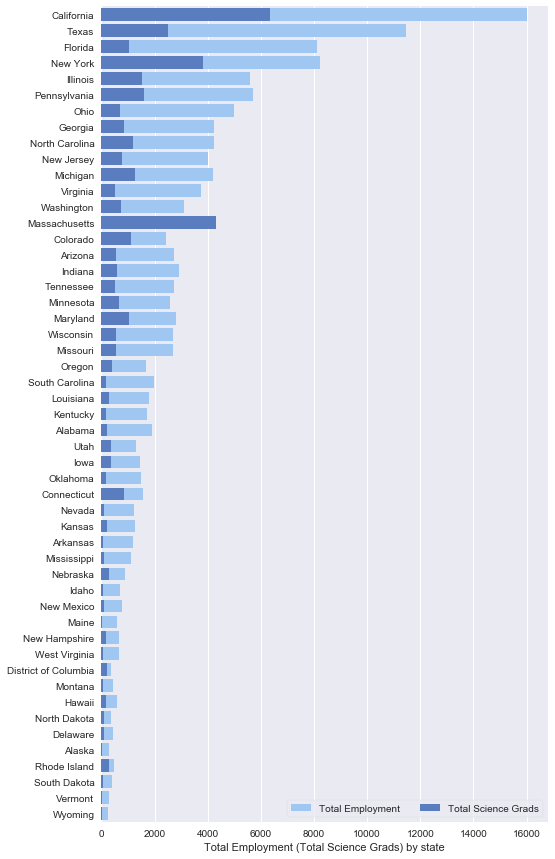

In [119]:
sns.set()
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 15))

#state_merge_data.sort_values(['us_population'], ascending=False, inplace=True)

sns.set_color_codes("pastel")
sns.barplot(x="total_employed", y="state", data=state_merge_data,
            label="Total Employment", color="b")

sns.set_color_codes("muted")
sns.barplot(x="totals_science", y="state", data=state_merge_data,
            label="Total Science Grads", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Total Employment (Total Science Grads) by state")
sns.despine(left=True, bottom=True)

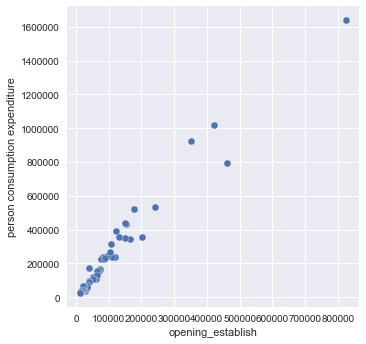

In [103]:
sns.pairplot(x_vars=["opening_establish"], y_vars=["person consumption expenditure"], 
             data=state_merge_data, size=5)

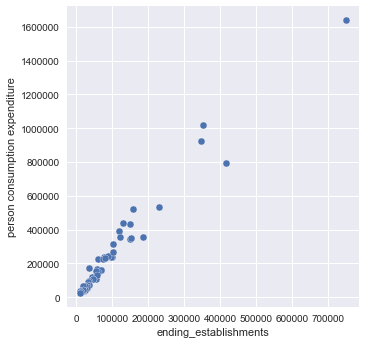

In [104]:
sns.pairplot(x_vars=["ending_establishments"], y_vars=["person consumption expenditure"], 
             data=state_merge_data, size=5)

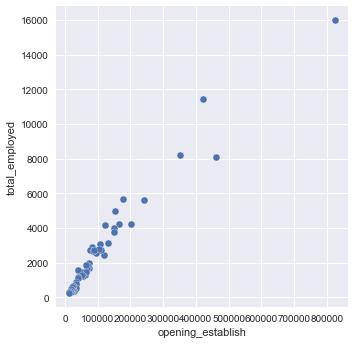

In [109]:
sns.pairplot(x_vars=["opening_establish"], y_vars=["total_employed"], 
             data=state_merge_data, size=5)